In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [32]:
data = pd.read_csv('childhood_obesity_data.csv')


In [65]:

data.head(7)

,local_authority_area,Average_male_rate,Average_female_rate
0,Barking and Dagenham,0.2500,0.4710
1,Barnet,0.1440,0.2170
2,Barnsley,0.1530,0.2110
3,Bath and North East Somerset,0.1680,0.3330
4,Bedford,0.1800,0.2260
5,Bexley,0.2060,0.2990
6,Birmingham,0.1750,0.4700


In [66]:
# plot method
def runplt():
    plt.figure()
    plt.title("Average_female_rate plotted against Average_male_rate")
    plt.xlabel('Average_male_rate(%)')
    plt.ylabel('Average_female_rate(%)')
    plt.grid(True)
    plt.xlim(0,1.5)
    plt.ylim(0,1.5)
    return plt

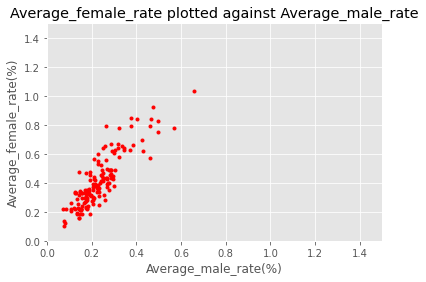

<Figure size 432x288 with 0 Axes>

In [63]:
Average_male_rate = data.loc[:,'Average_male_rate'].values
Average_female_rate = data.loc[:,'Average_female_rate'].values
#print(dia)
#print(price)
plt = runplt()
plt.plot(Average_male_rate, Average_female_rate, 'r.')
plt.show()
plt.savefig('data_distribution1.png')

In [67]:
Average_male_rate

array([0.25 , 0.144, 0.153, 0.168, 0.18 , 0.206, 0.175, 0.401, 0.264,
       0.184, 0.46 , 0.15 , 0.334, 0.285, 0.18 , 0.298, 0.13 , 0.169,
       0.231, 0.193, 0.208, 0.133, 0.167, 0.267, 0.241, 0.073, 0.374,
       0.384, 0.154, 0.17 , 0.141, 0.229, 0.315, 0.14 , 0.21 , 0.226,
       0.263, 0.149, 0.305, 0.219, 0.229, 0.194, 0.158, 0.149, 0.18 ,
       0.155, 0.291, 0.267, 0.278, 0.17 , 0.197, 0.294, 0.243, 0.231,
       0.143, 0.238, 0.189, 0.203, 0.261, 0.085, 0.225, 0.174, 0.205,
       0.125, 0.15 , 0.228, 0.294, 0.212, 0.284, 0.176, 0.211, 0.247,
       0.134, 0.206, 0.278, 0.188, 0.284, 0.28 , 0.191, 0.158, 0.267,
       0.139, 0.18 , 0.213, 0.191, 0.124, 0.229, 0.252, 0.281, 0.323,
       0.251, 0.475, 0.465, 0.301, 0.107, 0.145, 0.233, 0.265, 0.211,
       0.08 , 0.178, 0.132, 0.141, 0.274, 0.246, 0.124, 0.497, 0.191,
       0.223, 0.156, 0.275, 0.46 , 0.142, 0.193, 0.251, 0.118, 0.425,
       0.105, 0.242, 0.266, 0.342, 0.431, 0.207, 0.287, 0.248, 0.179,
       0.106, 0.152,

In [68]:
X_values = sm.add_constant(Average_male_rate)
y_values = Average_female_rate
regression_model_a = sm.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     469.6
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           4.68e-48
Time:                        19:19:48   Log-Likelihood:                 150.72
No. Observations:                 152   AIC:                            -297.4
Df Residuals:                     150   BIC:                            -291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.019      1.773      0.0

In [40]:
# store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = 1.6263470629571881
intercept = 0.033576380075369144
Rsquared  = 0.7579140300647627
MSE       = 0.008165767864289448
pvalue    = 4.6792283881861426e-48


In [42]:
# Use the next line to set figure height and width 
figure_width, figure_height = 1.5,1.5

# This line creates the endpoints of the best-fit line:
x_lobf = [min(Average_female_rate),max(Average_female_rate)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))




<Figure size 108x108 with 0 Axes>

<Figure size 108x108 with 0 Axes>

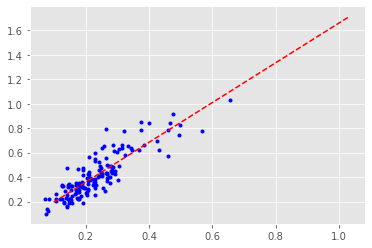

In [48]:
# create and save the plot:
plt.plot(Average_male_rate,y_values,'b.',x_lobf,y_lobf,'r--')
plt.savefig('regression_plot.png')

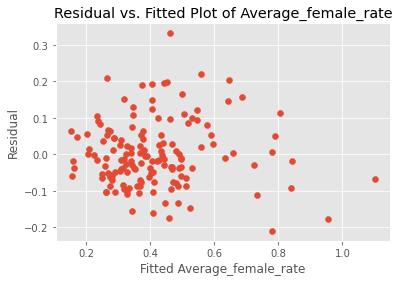

<Figure size 432x288 with 0 Axes>

In [61]:
# Residual analysis
# plot 
plt.scatter(regression_model_b.fittedvalues, regression_model_b.resid)
# adding title and labels
plt.xlabel('Fitted Average_female_rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Average_female_rate')
plt.show()
plt.savefig('ResidualvsFitted.png')

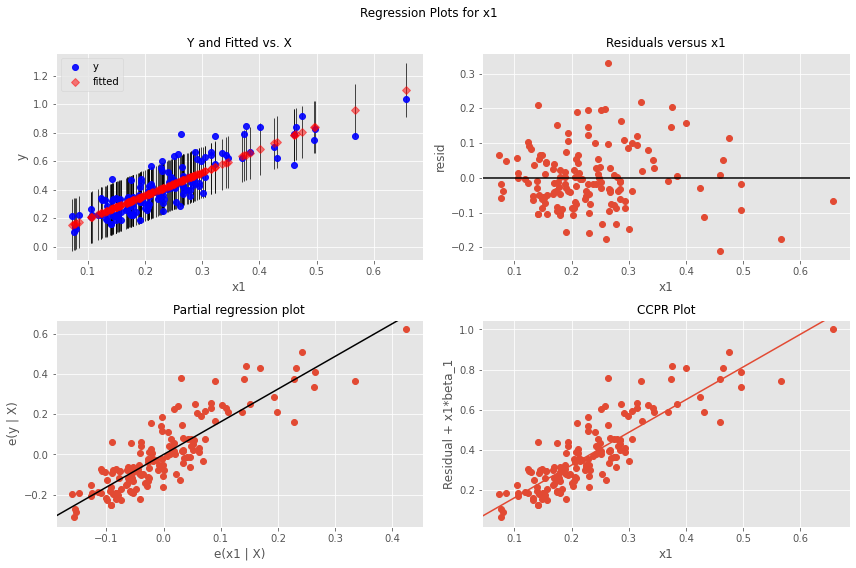

In [52]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'x1', fig=fig)
plt.savefig('residual_analysis.png')